<a href="https://colab.research.google.com/github/subinmun1997/Kakao_chatbot/blob/master/Keras_%26_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 460kB 35.1MB/s 
     |████████████████████████████████| 92kB 7.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
!pip install selenium

     |████████████████████████████████| 911kB 11.4MB/s 


Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 1.3288 - accuracy: 0.5723 - val_loss: 0.3918 - val_accuracy: 0.8844
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8909 - val_loss: 0.3147 - val_accuracy: 0.9076
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.9113 - val_loss: 0.2829 - val_accuracy: 0.9187
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9171 - val_loss: 0.2602 - val_accuracy: 0.9231
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9259 - val_loss: 0.2408 - val_accuracy: 0.9292
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2288 - accuracy: 0.9314 - val_loss: 0.2216 - val_accuracy: 0.9349
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2135 - accuracy: 0.9379 - val_loss: 0.2075 - val_accuracy:

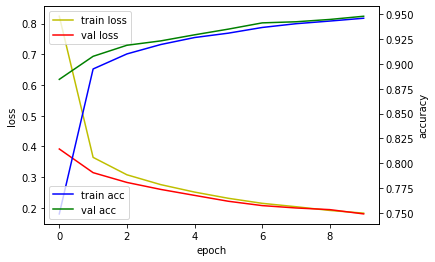

In [3]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0 

# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1819 - accuracy: 0.9464


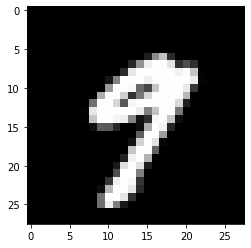

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()